# CAP 781 
# LAB - 01
# Data Pre-processing
## Importing and Exporting Data in Python, Data Wrangling, Exploratory Data Analysis

## Author

- **Name**: `Tanzeela Javid Kaloo` | `Assistant Professor`
- **Department**: Systems and Architecture
- **University**: Lovely Professional University
- **Email**: tanzeela.jvd@gmail.com

# Used Car Market in India

<p style="font-size: 15px; color: black; font-family: TimesNewRoman">
The Indian market for used cars is experiencing significant demand, surpassing that of new cars. As new car sales have slowed down, the pre-owned car market has continued to grow, reaching a larger scale than the new car market. In this scenario, Cars4U, a promising tech start-up, aims to capitalize on opportunities within the used car market.
In the 2018-19 period, while new car sales amounted to 3.6 million units, approximately 4 million second-hand cars were bought and sold. The decline in new car sales suggests a shifting demand towards the pre-owned market. In fact, some car owners are now replacing their old cars with pre-owned ones rather than purchasing brand new vehicles. Unlike new cars, which have relatively predictable pricing and supply managed by Original Equipment Manufacturers (OEMs), used cars present a different challenge with considerable uncertainty in both pricing and supply. Therefore, establishing an effective pricing scheme for used cars becomes crucial for market growth. The aim is to develop a pricing model that accurately predicts the prices of used cars and enables the business to devise profitable strategies through differential pricing.</p>

# Dataset Description

This data set contains information about used cars for sale in India. The data set includes the following features:

- `Name` : The brand and model of the car.
- `Location` : The location in which the car is being sold or is available for purchase.
- `Year`: The year or edition of the model.
- `Kilometers_Driven` : The total kilometers driven in the car by the previous owner(s) in KM.
- `Fuel_Type` : The type of fuel used by the car.
- `Transmission` : The type of transmission used by the car.
- `Owner_Type` : Whether the ownership is Firsthand, Second hand or other.
- `Mileage` : The standard mileage offered by the car company in kmpl or km/kg.
- `Engine` : The displacement volume of the engine in cc.
- `Power` : The maximum power of the engine in bhp.
- `Seats` : The number of seats in the car.
- `New_Price` : Price of new model.

**Predicting Attribute**
- `Price` : The price of the used car in INR Lakhs.

$$Lakh = \frac{Million}{10}$$

$$Crore (Cr) = 100 * Lakh$$ 

or

$$Crore (Cr) = 10 * Million$$ 


This data set can be used to analyze the pricing trends of used cars in India based on various factors such as location, year, kilometers driven, and other features. Additionally, this data set can be used to build predictive models to estimate the price of used cars based on their characteristics.


**For more details check:** https://www.kaggle.com/datasets/sukhmanibedi/cars4u

In [28]:
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

# Loading Dataset

In [29]:
# import libraries
import numpy as np
import pandas as pd

# Load Data
data = pd.read_csv("datasets/used_cars_data.csv")
display(data.head())

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


# Data Cleaning
## 1. Overview of Dataset Variables and Summary Statistics

In [30]:
# Check the number of attriutes and instances in the dataset
print(f'There are {data.shape[0]} rows and {data.shape[1]} columns')

There are 7253 rows and 14 columns


In [31]:
# Check the data types of each column
print("Data types:\n", data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   object 
 9   Engine             7207 non-null   object 
 10  Power              7207 non-null   object 
 11  Seats              7200 non-null   float64
 12  New_Price          1006 non-null   object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 793.4+ KB
Data types:
 None


In [32]:
# Setting max column width to avoid truncation of column names
pd.set_option('max_colwidth', 100)

# Creating an empty DataFrame
data_descpt = pd.DataFrame()

# Checking the number of numerical variables using len() and select_dtypes
data_descpt["Number of Numerical Variables"] = [len(data.select_dtypes('number').columns)]

# Numerical columns in the dataset
data_descpt["Numerical Columns"] = [data.select_dtypes('number').columns.tolist()]

# Checking the number of object (categorical) variables using len() and select_dtypes
data_descpt["Number of Object Variables"] = [len(data.select_dtypes('object').columns)]

# Object columns in the dataset
data_descpt["Object Columns"] = [data.select_dtypes('object').columns.tolist()]

# Total number of variables (columns) in the dataset
data_descpt["Total Number of Variables"] = [data.shape[1]]

# Total number of rows in the dataset
data_descpt["Total Number of Rows"] = [data.shape[0]]

# Calculating the number of missing cells/null values in the dataset
data_descpt["Missing Cells"] = [data.isnull().sum().sum()]

# Converting the number of missing cells into a percentage
data_descpt["Missing Cells (%)"] = [(data.isnull().sum().sum()) * 100 / (data.shape[0] * data.shape[1])]

# Calculating the number of duplicate rows in the dataset
data_descpt["Duplicate Rows"] = [data.duplicated().sum()]

# Renaming the column name and displaying the DataFrame
display(data_descpt.T.rename(columns={0: 'Dataset Statistics'}))

,Dataset Statistics
Number of Numerical Variables,5
Numerical Columns,"[S.No., Year, Kilometers_Driven, Seats, Price]"
Number of Object Variables,9
Object Columns,"[Name, Location, Fuel_Type, Transmission, Owner_Type, Mileage, Engine, Power, New_Price]"
Total Number of Variables,14
Total Number of Rows,7253
Missing Cells,7628
Missing Cells (%),7.512162
Duplicate Rows,0


## 2. Checking Missing Values

In [33]:
# Check the missing values (NaN) in each column
missing_values_count = data.isnull().sum()

# Percentage of missing values in each attribute
missing_values_percentage = round(data.isna().sum() / data.isna().count() * 100, 2)

# Create a DataFrame with two columns
missing_values_df = pd.DataFrame({'Missing Values Count': missing_values_count, 'Missing Values Percentage': missing_values_percentage})

missing_values_df

,Missing Values Count,Missing Values Percentage
S.No.,0,0.00
Name,0,0.00
Location,0,0.00
Year,0,0.00
Kilometers_Driven,0,0.00
Fuel_Type,0,0.00
Transmission,0,0.00
Owner_Type,0,0.00
Mileage,2,0.03
Engine,46,0.63


## 3. Checking Unique Values

In [34]:
# Check the unique values in all columns
unique_values_count = data.nunique()

# Create a DataFrame
unique_values_df = pd.DataFrame({'Unique Values Count': unique_values_count})

unique_values_df

,Unique Values Count
S.No.,7253
Name,2041
Location,11
Year,23
Kilometers_Driven,3660
Fuel_Type,5
Transmission,2
Owner_Type,4
Mileage,450
Engine,150


## 4. Removing Inconsistencies 
To address the inconsistencies present in the dataset, we will perform the following tasks:

1. Remove the "`S.No`" column from the dataset.
2. Drop rows with missing values in the "`Price`" column (the predictive attribute).
3. Remove units from the "`Mileage`," "`Power`," and "`Kilometers_Driven`" columns.
4. Convert the values in the "`New_Price`" and "`Price`" columns to a standard form (Million) and remove the unit of measurement.
5. Add a new column called "`Car_Age`" to the dataset by subtracting the "`Year`" column from the current year.
6. Extract the "`Brand_Name`" and "`Car_Model`" from the "`Name`" column.
7. Change Zero values in Numerical columns to NaN

By performing these data cleaning steps, we aim to ensure consistency and improve the quality of the dataset for further analysis and modeling.

### Remove S.No.

In [35]:
#Drop the S.No Column from the dataframe
data = data.drop(columns=['S.No.'], axis=1)

### Drop Missing values from Target Variable

Since the target variable in this dataset is "`Price`", we remove all the rows from the dataset where the value for the target variable is missing.

In [36]:
data = data.dropna(subset=['Price'])

### Check the Missing Values in the Remaining Dataset

In [37]:
# Check the missing values (NaN) in each column
missing_values_count = data.isnull().sum()

# Percentage of missing values in each attribute
missing_values_percentage = round(data.isna().sum() / data.isna().count() * 100, 2)

# Create a DataFrame with two columns
missing_values_df = pd.DataFrame({'Missing Values Count': missing_values_count, 'Missing Values Percentage': missing_values_percentage})

display(missing_values_df)

,Missing Values Count,Missing Values Percentage
Name,0,0.00
Location,0,0.00
Year,0,0.00
Kilometers_Driven,0,0.00
Fuel_Type,0,0.00
Transmission,0,0.00
Owner_Type,0,0.00
Mileage,2,0.03
Engine,36,0.60
Power,36,0.60


### Removing Units of Measurement

The units of measurement for features such as `kmpl`, `km/kg`, `CC`, `bhp`, and `Lakh` / `Cr` are not standardized across car manufacturers or models, making it difficult to compare them directly. Removing these units of measurement from the features simplifies the data and makes it easier to work with. We can still use the numerical values associated with these features for analysis and modeling purposes, even without their respective units of measurement. 


In [38]:
# Remove bhp from Power Data Feature.
df_col=pd.DataFrame()
df_col['Power'] = data['Power']

pattern = r'([\d\.]+) bhp'
df_col['numeric_value'] = df_col['Power'].str.extract(pattern)
df_col['numeric_value'] = df_col['numeric_value'].astype(float)

# Adding new updated values back to the Datasets
data = data.drop(columns=["Power"], axis=1)
data['Power'] = df_col['numeric_value']

##########################################################################
# Remove CC from Engine Data Feature.
df_col=pd.DataFrame()
df_col['Engine'] = data['Engine']
pattern = r'([\d\.]+) CC'
df_col['numeric_value'] = df_col['Engine'].str.extract(pattern)
df_col['numeric_value'] = df_col['numeric_value'].astype(float)

# Adding new updated values back to the Datasets
data = data.drop(columns=["Engine"], axis=1)
data['Engine'] = df_col['numeric_value']

###########################################################################
# Remove km/kg and kmpl from Mileage Data Feature.
df_col=pd.DataFrame()
df_col['Mileage'] = data['Mileage']
pattern = r'([\d\.]+) km'
df_col['numeric_value'] = df_col['Mileage'].str.extract(pattern)
df_col['numeric_value'] = df_col['numeric_value'].astype(float)

# Adding new updated values back to the Datasets
data = data.drop(columns=["Mileage"], axis=1)
data['Mileage'] = df_col['numeric_value']

#############################################################################
## Updated Dataset
data.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,New_Price,Price,Power,Engine,Mileage
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,5.0,NaN,1.75,58.16,998.0,26.60
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,5.0,NaN,12.50,126.20,1582.0,19.67
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,5.0,8.61 Lakh,4.50,88.70,1199.0,18.20
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,7.0,NaN,6.00,88.76,1248.0,20.77
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,5.0,NaN,17.74,140.80,1968.0,15.20


### Preprocessing New_Price Column

This column contains a significant number of missing values, which we will address during the data imputation process. For the current analysis, we will focus on extracting the numeric values from this column.

In [39]:
# Create a new column after splitting the New_Price values.
import re

new_price_num = []

# Regex for numeric + " " + "Lakh"  format
regex_power = "^\d+(\.\d+)? Lakh$"

for observation in data["New_Price"]:
    if isinstance(observation, str):
        if re.match(regex_power, observation):
            # Converting values in Lakhs to Millions
            new_price_num.append(float(observation.split(" ")[0])/10)
        # else:
        #     # To detect if there are any observations in the column that do not follow [numeric + " " + "Lakh"]  format
        #     # that we see in the sample output
        #     print(
        #         "The data needs furthur processing.mismatch ",
        #         observation,
        #     )
    else:
        # If there are any missing values in the New_Price column, we add missing values to the new column
        new_price_num.append(np.nan)
        
        new_price_num = []

for observation in data["New_Price"]:
    if isinstance(observation, str):
        if re.match(regex_power, observation):
            # Converting values in Lakhs to Millions
            new_price_num.append(float(observation.split(" ")[0])/10)
        else:
            # Converting values in Crore to Millions
            new_price_num.append(float(observation.split(" ")[0]) * 10)
    else:
        # If there are any missing values in the New_Price column, we add missing values to the new column
        new_price_num.append(np.nan)

#Drop the New_Price Column from the datafram 
data = data.drop(columns=['New_Price'], axis=1)
        
# Add the new column to the data
data["New_Price"] = new_price_num

## Updated Dataset
data.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,Price,Power,Engine,Mileage,New_Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,5.0,1.75,58.16,998.0,26.60,NaN
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,5.0,12.50,126.20,1582.0,19.67,NaN
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,5.0,4.50,88.70,1199.0,18.20,0.861
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,7.0,6.00,88.76,1248.0,20.77,NaN
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,5.0,17.74,140.80,1968.0,15.20,NaN


### Add Car_Age Column

In order to determine the age of each car and assess its impact on the price, we need to transform the existing "Year" column. The current format (e.g., 2014, 1996) does not provide direct information about the car's age.

To address this, we will create two new columns: "Current_Year" and "Car_Age". The "Current_Year" column will be set as 2021, representing the current year. The "Car_Age" column will be calculated by subtracting the "Year" value from the "Current_Year". Finally, we will drop the "Current_Year" column since it serves its purpose in deriving the car age.

By performing these transformations, we can obtain the car's age in years and utilize it in further analyses.

In [40]:
data['Current_year'] = 2023
data['Car_Age'] = data['Current_year']- data['Year']
data.drop('Current_year',axis=1,inplace=True)

data.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,Price,Power,Engine,Mileage,New_Price,Car_Age
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,5.0,1.75,58.16,998.0,26.60,NaN,13
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,5.0,12.50,126.20,1582.0,19.67,NaN,8
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,5.0,4.50,88.70,1199.0,18.20,0.861,12
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,7.0,6.00,88.76,1248.0,20.77,NaN,11
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,5.0,17.74,140.80,1968.0,15.20,NaN,10


### Add Brand_Name and Car_Model Column

The brand of a car plays a significant role in car selection and pricing. In order to leverage this information, we will extract the brand names from the "`Name`" column.

By extracting the brand names, we can gain insights into the impact of different brands on car prices and perform brand-specific analyses.

In [41]:
# Dropping rows with null values in the 'Name' column
data = data.dropna(subset=['Name'])

# Extracting brand and model from the 'Name' column
data['Brand'] = data['Name'].str.split(' ').str[0]  # Extracting the brand name
data['Model'] = data['Name'].str.split(' ').str[1] + data['Name'].str.split(' ').str[2]  # Combining the model name

data = data.drop(columns=['Name'], axis=1)
data.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,Price,Power,Engine,Mileage,New_Price,Car_Age,Brand,Model
0,Mumbai,2010,72000,CNG,Manual,First,5.0,1.75,58.16,998.0,26.60,NaN,13,Maruti,WagonR
1,Pune,2015,41000,Diesel,Manual,First,5.0,12.50,126.20,1582.0,19.67,NaN,8,Hyundai,Creta1.6
2,Chennai,2011,46000,Petrol,Manual,First,5.0,4.50,88.70,1199.0,18.20,0.861,12,Honda,JazzV
3,Chennai,2012,87000,Diesel,Manual,First,7.0,6.00,88.76,1248.0,20.77,NaN,11,Maruti,ErtigaVDI
4,Coimbatore,2013,40670,Diesel,Automatic,Second,5.0,17.74,140.80,1968.0,15.20,NaN,10,Audi,A4New


In [42]:
# Checking total Number of Brands
data.Brand.unique()

array(['Maruti', 'Hyundai', 'Honda', 'Audi', 'Nissan', 'Toyota',
       'Volkswagen', 'Tata', 'Land', 'Mitsubishi', 'Renault',
       'Mercedes-Benz', 'BMW', 'Mahindra', 'Ford', 'Porsche', 'Datsun',
       'Jaguar', 'Volvo', 'Chevrolet', 'Skoda', 'Mini', 'Fiat', 'Jeep',
       'Smart', 'Ambassador', 'Isuzu', 'ISUZU', 'Force', 'Bentley',
       'Lamborghini'], dtype=object)

In [43]:
# Remoning inconsistencies in brand names 
brand_names = ['ISUZU', 'Isuzu', 'Mini', 'Land']
data[data['Brand'].isin(brand_names)].sample(5)

data.loc[data['Brand'] == 'ISUZU', 'Brand'] = 'Isuzu'
data.loc[data['Brand'] == 'Mini', 'Brand'] = 'Mini_Cooper'
data.loc[data['Brand'] == 'Land', 'Brand'] = 'Land_Rover'
data.loc[data['Brand'] == 'Mercedes-Benz', 'Brand'] = 'Mercedes_Benz'

# Checking the updated brand name list
data.Brand.unique()

array(['Maruti', 'Hyundai', 'Honda', 'Audi', 'Nissan', 'Toyota',
       'Volkswagen', 'Tata', 'Land_Rover', 'Mitsubishi', 'Renault',
       'Mercedes_Benz', 'BMW', 'Mahindra', 'Ford', 'Porsche', 'Datsun',
       'Jaguar', 'Volvo', 'Chevrolet', 'Skoda', 'Mini_Cooper', 'Fiat',
       'Jeep', 'Smart', 'Ambassador', 'Isuzu', 'Force', 'Bentley',
       'Lamborghini'], dtype=object)

### Replace Zeros with NaN 

Determine the count of zero values present in all numerical features. Replace these zero values with NaN (Not a Number) so that they can be treated as missing values when dealing with missing data.

In [44]:
numerical_features = ['Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats', 'New_Price']

# Count number of zeroes in specified columns
zero_counts = data[numerical_features].eq(0).sum()
null_count = data[numerical_features].isna().sum()

# Replace zero values with NaN in numerical features
data[numerical_features] = data[numerical_features].replace(0, np.nan)

# Count number of zeroes after replacing with NaN
zero_counts_updated = data[numerical_features].eq(0).sum()
null_count_updated = data[numerical_features].isna().sum()

# Create a DataFrame with original and updated zero counts
zero_counts_df = pd.DataFrame({'Original Zero Counts': zero_counts, 'Updated Zero Counts': zero_counts_updated,
                               'Original Null Count': null_count, 'Updated Null Count': null_count_updated})

# Print the DataFrame
zero_counts_df

,Original Zero Counts,Updated Zero Counts,Original Null Count,Updated Null Count
Year,0,0,0,0
Kilometers_Driven,0,0,0,0
Mileage,68,0,2,70
Engine,0,0,36,36
Power,0,0,143,143
Seats,1,0,42,43
New_Price,0,0,5195,5195


In [45]:
# Updated Dataset
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 6019 entries, 0 to 6018
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Location           6019 non-null   object 
 1   Year               6019 non-null   int64  
 2   Kilometers_Driven  6019 non-null   int64  
 3   Fuel_Type          6019 non-null   object 
 4   Transmission       6019 non-null   object 
 5   Owner_Type         6019 non-null   object 
 6   Seats              5976 non-null   float64
 7   Price              6019 non-null   float64
 8   Power              5876 non-null   float64
 9   Engine             5983 non-null   float64
 10  Mileage            5949 non-null   float64
 11  New_Price          824 non-null    float64
 12  Car_Age            6019 non-null   int64  
 13  Brand              6019 non-null   object 
 14  Model              6019 non-null   object 
dtypes: float64(6), int64(3), object(6)
memory usage: 752.4+ KB
None


# Final Cleaned Dataset

In [46]:
display(data.head())

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,Price,Power,Engine,Mileage,New_Price,Car_Age,Brand,Model
0,Mumbai,2010,72000,CNG,Manual,First,5.0,1.75,58.16,998.0,26.60,NaN,13,Maruti,WagonR
1,Pune,2015,41000,Diesel,Manual,First,5.0,12.50,126.20,1582.0,19.67,NaN,8,Hyundai,Creta1.6
2,Chennai,2011,46000,Petrol,Manual,First,5.0,4.50,88.70,1199.0,18.20,0.861,12,Honda,JazzV
3,Chennai,2012,87000,Diesel,Manual,First,7.0,6.00,88.76,1248.0,20.77,NaN,11,Maruti,ErtigaVDI
4,Coimbatore,2013,40670,Diesel,Automatic,Second,5.0,17.74,140.80,1968.0,15.20,NaN,10,Audi,A4New


# Data Exploration Using Visualization Tools

## 1. Overview of Dataset Variables and Summary Statistics

In [47]:
# Creating an empty DataFrame
data_descpt = pd.DataFrame()

# Checking the number of numerical variables using len() and select_dtypes
data_descpt["Number of Numerical Variables"] = [len(data.select_dtypes('number').columns)]

# Numerical columns in the dataset
data_descpt["Numerical Columns"] = [data.select_dtypes('number').columns.tolist()]

# Checking the number of object (categorical) variables using len() and select_dtypes
data_descpt["Number of Object Variables"] = [len(data.select_dtypes('object').columns)]

# Object columns in the dataset
data_descpt["Object Columns"] = [data.select_dtypes('object').columns.tolist()]

# Total number of variables (columns) in the dataset
data_descpt["Total Number of Variables"] = [data.shape[1]]

# Total number of rows in the dataset
data_descpt["Total Number of Rows"] = [data.shape[0]]

# Calculating the number of missing cells/null values in the dataset
data_descpt["Missing Cells"] = [data.isnull().sum().sum()]

# Converting the number of missing cells into a percentage
data_descpt["Missing Cells (%)"] = [(data.isnull().sum().sum()) * 100 / (data.shape[0] * data.shape[1])]

# Calculating the number of duplicate rows in the dataset
data_descpt["Duplicate Rows"] = [data.duplicated().sum()]

# Renaming the column name and displaying the DataFrame
data_descpt = data_descpt.T.rename(columns={0: 'Dataset Statistics'})
data_descpt

,Dataset Statistics
Number of Numerical Variables,9
Numerical Columns,"[Year, Kilometers_Driven, Seats, Price, Power, Engine, Mileage, New_Price, Car_Age]"
Number of Object Variables,6
Object Columns,"[Location, Fuel_Type, Transmission, Owner_Type, Brand, Model]"
Total Number of Variables,15
Total Number of Rows,6019
Missing Cells,5487
Missing Cells (%),6.077421
Duplicate Rows,0


## 2. Visualize Missing Data

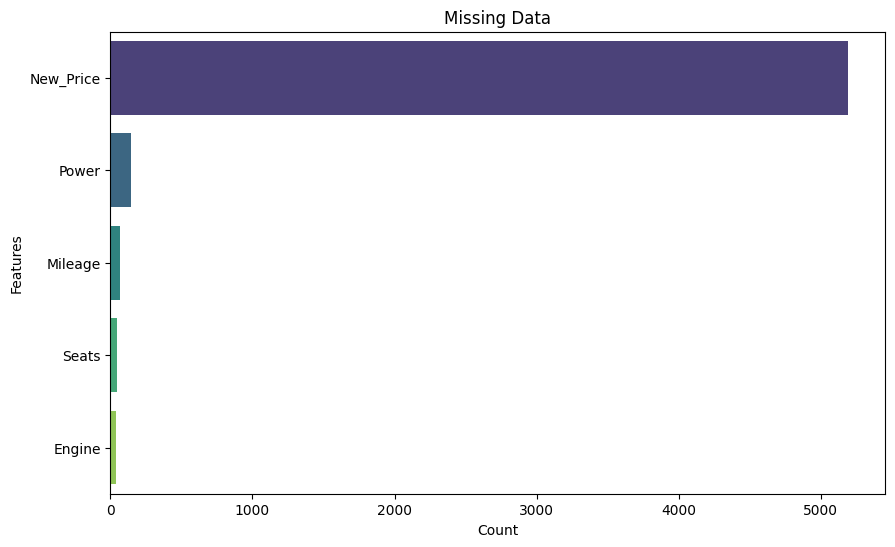

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

# Count the missing values in each column
missing_values = data.isnull().sum()
missing_values = missing_values[missing_values > 0]  # Select columns with missing values

# Sort the columns in decreasing order of missing values
missing_values = missing_values.sort_values(ascending=False)

# Create a bar plot of missing values
plt.figure(figsize=(10, 6))
sns.barplot(x=missing_values.values, y=missing_values.index, palette='viridis')
plt.title('Missing Data')
plt.xlabel('Count')
plt.ylabel('Features')
plt.show()


## 3. Describe Numerical Columns

In [49]:
# More statistical insight about the dataset
display(data.describe().T)

,count,mean,std,min,25%,50%,75%,max
Year,6019.0,2013.358199,3.269742,1998.000,2011.00000,2014.000,2016.000,2019.00
Kilometers_Driven,6019.0,58738.380296,91268.843206,171.000,34000.00000,53000.000,73000.000,6500000.00
Seats,5976.0,5.279618,0.806019,2.000,5.00000,5.000,5.000,10.00
Price,6019.0,9.479468,11.187917,0.440,3.50000,5.640,9.950,160.00
Power,5876.0,113.253050,53.874957,34.200,75.00000,97.700,138.100,560.00
Engine,5983.0,1621.276450,601.355233,72.000,1198.00000,1493.000,1984.000,5998.00
Mileage,5949.0,18.342252,4.175475,6.400,15.30000,18.200,21.100,33.54
New_Price,824.0,2.307566,2.618241,0.391,0.79775,1.167,2.656,23.00
Car_Age,6019.0,9.641801,3.269742,4.000,7.00000,9.000,12.000,25.00


- `Year`: The cars in the dataset range from 1998 to 2019, with an average year of 2013. The majority of cars fall between the years 2011 and 2016.
- `Kilometers_Driven`: The average kilometers driven is approximately 58,738, with a wide range from 171 to 6,500,000.
- `Seats`: The average number of seats in the cars is around 5. Most cars have 5 seats, with a minimum of 2 seats and a maximum of 10 seats.
- `Price`: The average price of the cars is 9.48, with a minimum price of 0.44 and a maximum price of 160.
- `Power`: The average power of the cars is 113.25, ranging from 34.2 to 560.
- `Engine`: The average engine capacity is 1621.28, with a minimum of 72 and a maximum of 5998.
- `Mileage`: The average mileage is 18.34 km/l, ranging from 6.4 to 33.54 km/l.
- `New_Price`: The average new price is 2.31, with a minimum of 0.391 and a maximum of 23.
- `Car_Age`: The average age of the cars is approximately 9.64 years, ranging from 4 to 25 years.

## 4. Check the Spread of Numerical Data

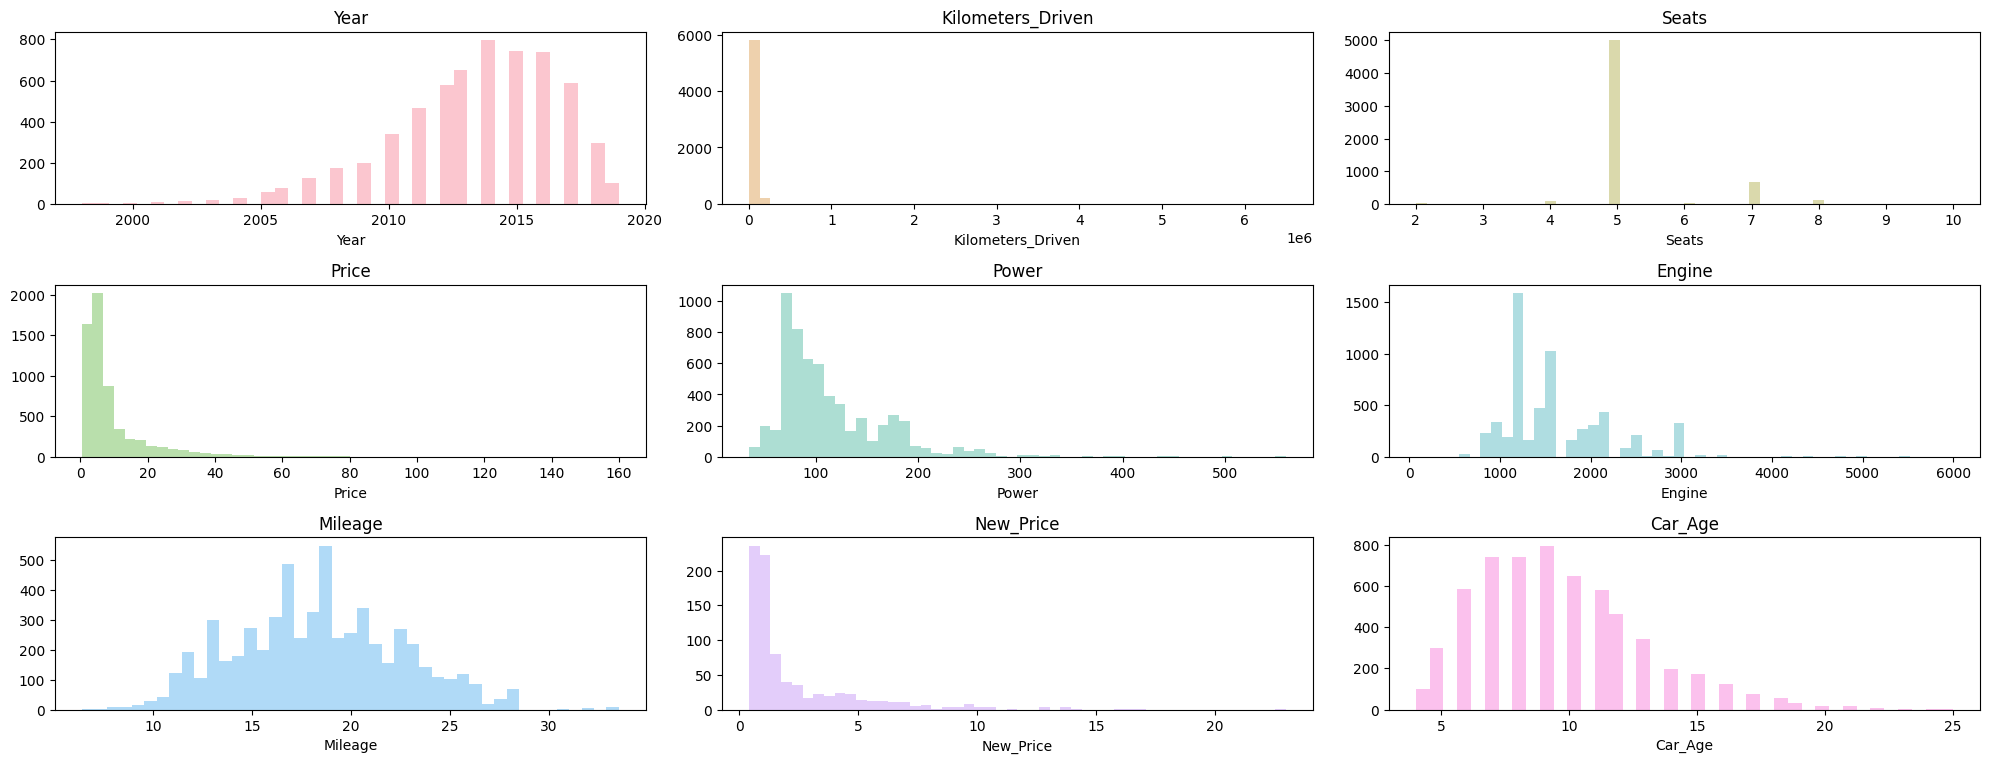

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Assuming 'cars' is your DataFrame containing the data

# plt.style.use('ggplot')

# Select all quantitative columns for checking the spread
numeric_columns = data.select_dtypes(include=np.number).columns.tolist()

# Define a color palette with multiple colors
color_palette = sns.color_palette("husl", len(numeric_columns))

plt.figure(figsize=(20, 25))

for i, variable in enumerate(numeric_columns):
    plt.subplot(10, 3, i + 1)
    sns.distplot(data[variable], kde=False, color=color_palette[i])
    plt.tight_layout()
    plt.title(variable)

plt.show()


- `Year`: The distribution of the car years is left-skewed, indicating that there are more recent cars in the dataset. However, there are outliers on the lower end, suggesting the presence of older cars. Consideration can be given to dropping this column from further analysis.
- `Kilometers_Driven`: The distribution of kilometers driven by the cars is right-skewed, indicating that most cars have relatively lower mileage. However, there are some cars with exceptionally high mileage, which could be considered as outliers.
- `Mileage`: The distribution of mileage appears to be approximately normally distributed, with a few outliers on both the upper and lower ends. Further investigation is recommended to analyze these outliers and their potential impact on the overall analysis.
- `Engine`, `Power`, and `Price`: These columns display right-skewed distributions, indicating that most cars have relatively lower engine capacity, power, and price. However, there are outliers on the upper end, suggesting the presence of cars with higher specifications in these aspects. These outliers may need to be examined in detail to understand their influence on the analysis.
- `Car_Age`: The distribution of car age is right-skewed, indicating that most cars in the dataset are relatively newer.

## 5. Check the Distribution of Categorical Data

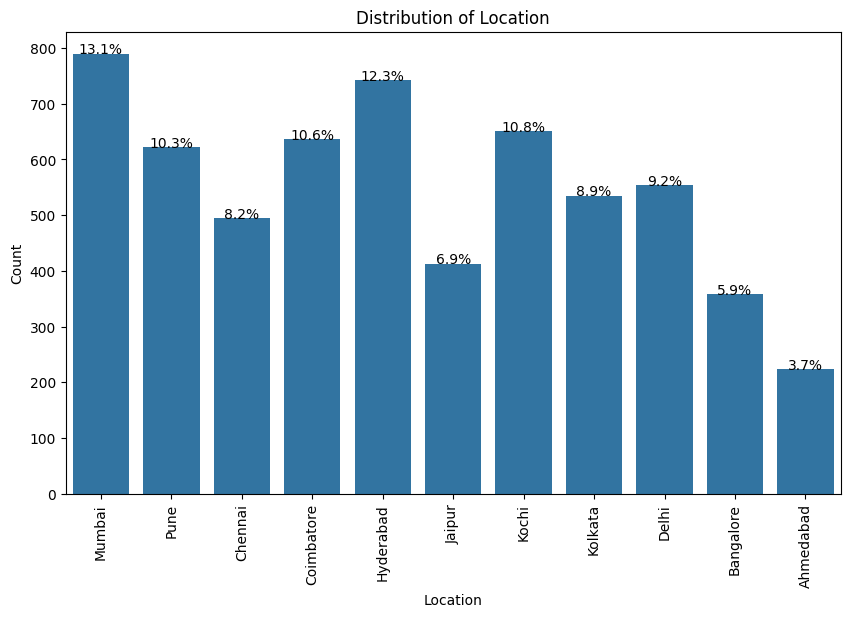

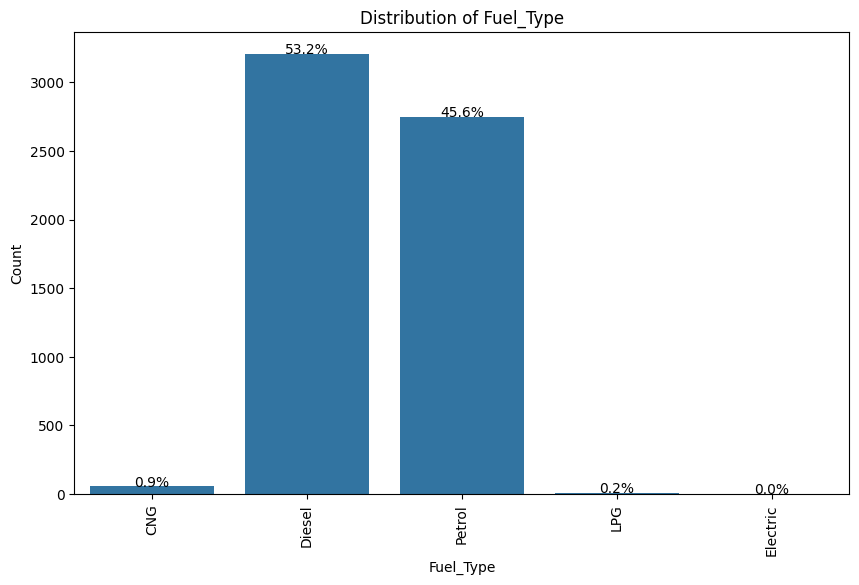

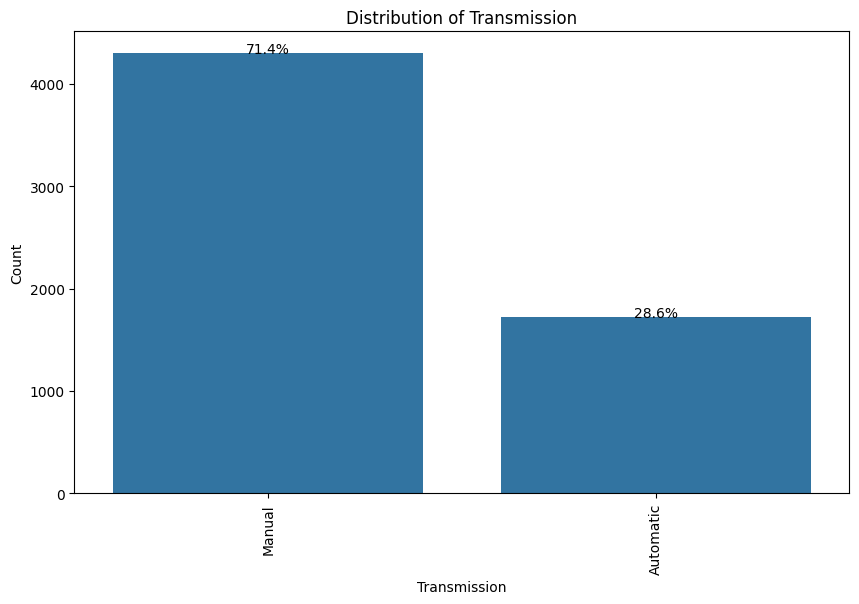

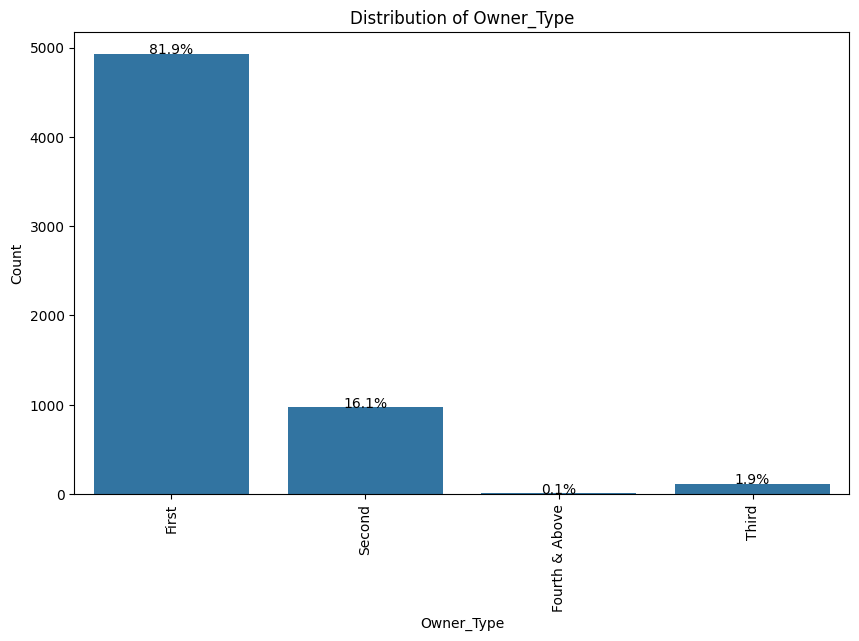

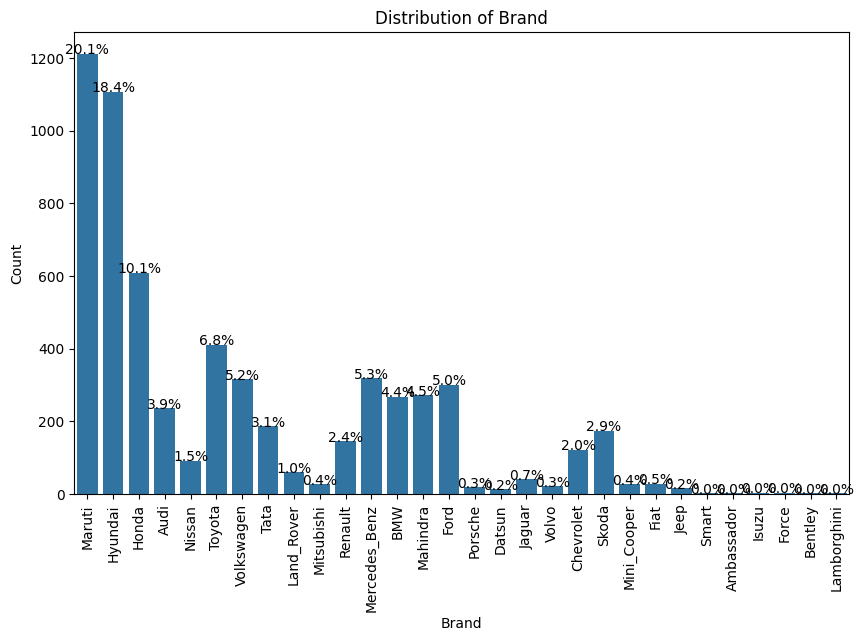

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

categorical_columns = ['Location', 'Fuel_Type', 'Transmission', 'Owner_Type', 'Brand']

for column in categorical_columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=data, x=column)
    plt.title(f'Distribution of {column}')
    plt.xticks(rotation=90)
    plt.xlabel(column)
    plt.ylabel('Count')

    # Add percentage labels to each bar
    total_count = len(data[column])
    for p in plt.gca().patches:
        percentage = '{:.1f}%'.format(100 * p.get_height() / total_count)
        x = p.get_x() + p.get_width() / 2
        y = p.get_height()
        plt.annotate(percentage, (x, y), ha='center')
    plt.show()


## 6. Calculate and Visualize Correlations

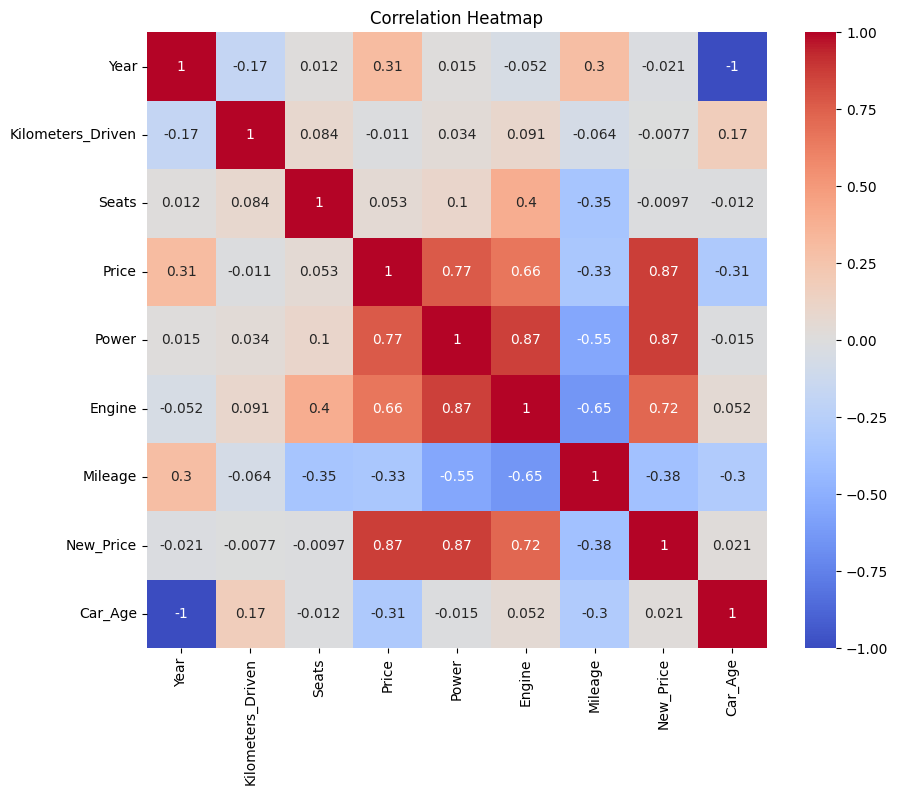

In [52]:
correlation_matrix = data[numeric_columns].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

- `Year` is positively correlated with Price and Mileage, indicating that newer cars tend to have higher prices and better mileage. It also has a negative correlation with Car_Age, as expected.
- `Kilometers_Driven` has a weak negative correlation with Year, suggesting that older cars tend to have higher mileage.
- `Seats` have a weak positive correlation with Engine and Power, indicating that cars with more seats tend to have larger engines and higher power.
- `Price` has a strong positive correlation with Power and Engine, indicating that cars with higher power and engine capacity tend to have higher prices. It also has a moderate positive correlation with New_Price, suggesting that cars with higher prices also have higher new prices.
- `Power` has a strong positive correlation with Engine, indicating that cars with larger engines tend to have higher power.
- `Mileage` has a negative correlation with Power, Engine, and New_Price, suggesting that cars with better mileage tend to have lower power, engine capacity, and new prices.
- `Car_Age` has a negative correlation with Year, indicating that newer cars tend to have lower ages.

## 7. Price vs Various Other Features

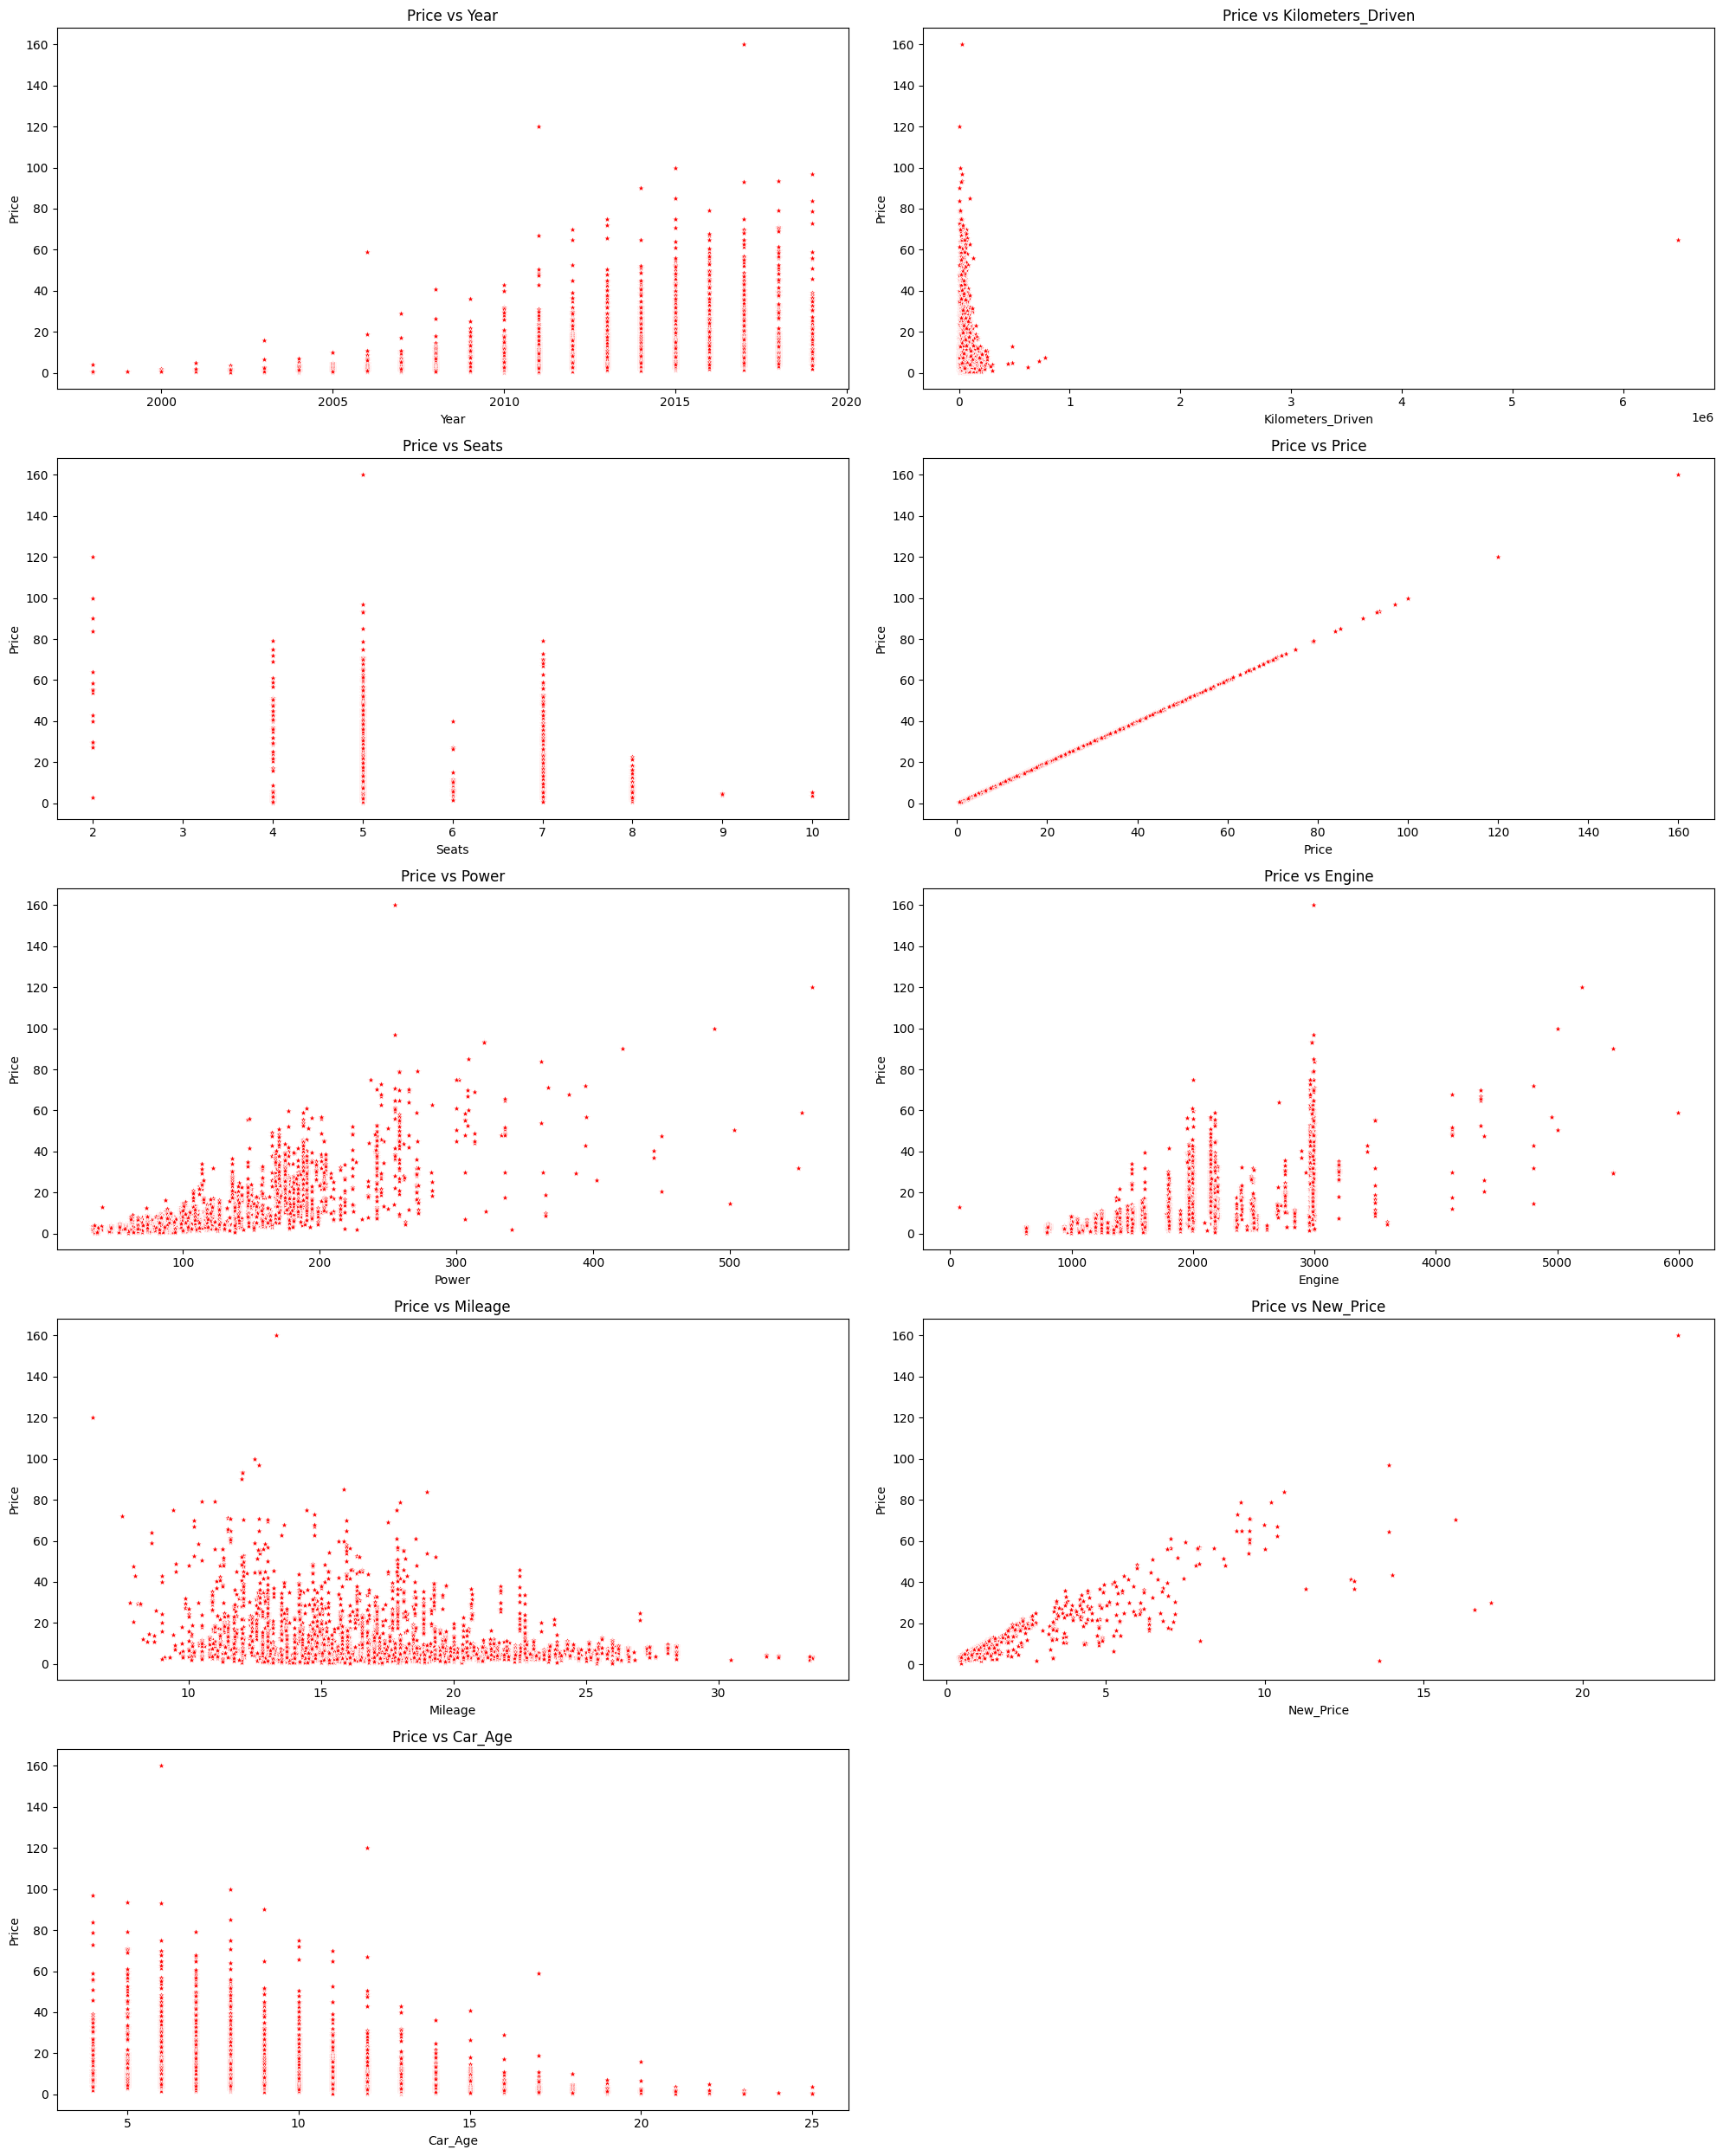

In [53]:
numeric_columns = data.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=(20,25))

for i, variable in enumerate(numeric_columns):
    plt.subplot(5, 2, i+1)
    sns.scatterplot(x=data[variable], y=data['Price'], color='red', marker='*').set(title='Price vs '+ variable)
    plt.tight_layout()

plt.show()

The scatter plots show the relationship between the Price and various numerical variables in the dataset.

- `Year`: There is a positive linear trend between the Year and Price, indicating that newer cars generally have higher prices. However, there are some outliers with low prices for recent years.

- `Kilometers_Driven`: There doesn't seem to be a strong linear relationship between Kilometers_Driven and Price. Most of the data points are concentrated in the lower range of kilometers driven, and there are some outliers with high prices for higher kilometers driven.

- `Seats`: The number of seats doesn't show a clear linear relationship with Price. Cars with 5 seats are the most common and have a wide range of prices.

- `Power`: There is a positive linear relationship between Power and Price, suggesting that cars with higher power tend to have higher prices. However, there is significant variation in prices for a given power level.

- `Engine`: Similar to Power, there is a positive linear relationship between Engine capacity and Price. Cars with larger engine capacities generally have higher prices, but there are variations in prices within each engine capacity category.

- `Mileage`: There is no clear linear relationship between Mileage and Price. Cars with different mileage values have a wide range of prices, indicating that Mileage alone is not a strong predictor of Price.

- `New_Price`: There is a positive linear relationship between New_Price and Price, indicating that cars with higher original prices tend to have higher resale prices. However, there are some outliers with high prices for lower new prices.

Overall, the scatter plots provide insights into the relationships between numerical variables and the Price of cars. However, it is important to consider other factors and perform further analysis to make accurate predictions or draw conclusions.

In [54]:
import session_info
session_info.show()